In [0]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
df = pd.read_csv('/content/city_day.csv')

In [0]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [0]:
#df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
26214,Thiruvananthapuram,2020-04-27,14.13,34.27,5.60,8.98,12.48,5.65,0.49,5.50,42.41,NaN,NaN,NaN,63.0,Satisfactory
26215,Thiruvananthapuram,2020-04-28,23.84,44.32,6.27,10.01,13.80,5.73,0.44,5.62,44.55,NaN,NaN,NaN,60.0,Satisfactory
26216,Thiruvananthapuram,2020-04-29,18.54,34.48,6.17,9.67,13.35,5.93,0.51,5.52,38.97,NaN,NaN,NaN,57.0,Satisfactory
26217,Thiruvananthapuram,2020-04-30,20.57,48.19,6.28,9.52,13.56,5.84,0.46,5.32,39.23,NaN,NaN,NaN,57.0,Satisfactory
26218,Thiruvananthapuram,2020-05-01,17.58,37.49,2.56,7.84,9.34,4.85,0.45,7.10,31.16,NaN,NaN,NaN,82.0,Satisfactory


In [0]:
df.isnull().sum()

City              0
Date              0
PM2.5          4289
PM10          10766
NO             3233
NO2            3217
NOx            4043
NH3            9847
CO             1961
SO2            3544
O3             3660
Benzene        5287
Toluene        7555
Xylene        16807
AQI            4282
AQI_Bucket     4282
dtype: int64

In [0]:
df.shape

(26219, 16)

In [0]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [0]:
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace= True)
df['NO'].fillna(df['NO'].mean(), inplace= True)
df['NO2'].fillna(df['NO2'].mean(), inplace= True)
df['NOx'].fillna(df['NOx'].mean(), inplace= True)
df['NH3'].fillna(df['NH3'].mean(), inplace= True)
df['CO'].fillna(df['CO'].mean(), inplace= True)
df['SO2'].fillna(df['SO2'].mean(), inplace= True)
df['O3'].fillna(df['O3'].mean(), inplace= True)
df['Benzene'].fillna(df['Benzene'].mean(), inplace= True)
df['Toluene'].fillna(df['Toluene'].mean(), inplace= True)
df['Xylene'].fillna(df['Xylene'].mean(), inplace= True)
df['AQI'].fillna(df['AQI'].mean(), inplace= True)

In [0]:
df  = df.drop(['AQI_Bucket','PM10'], axis = 1)

In [0]:
df.isnull().sum()

City       0
Date       0
PM2.5      0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
df = df.sort_index()


In [0]:
df.head()

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,71.828907,0.92,18.22,17.15,25.336162,0.92,27.64,133.36,0.00,0.02,0.00,175.840908
1,Ahmedabad,2015-01-02,71.828907,0.97,15.69,16.46,25.336162,0.97,24.55,34.06,3.68,5.50,3.77,175.840908
2,Ahmedabad,2015-01-03,71.828907,17.40,19.30,29.70,25.336162,17.40,29.07,30.70,6.80,16.40,2.25,175.840908
3,Ahmedabad,2015-01-04,71.828907,1.70,18.48,17.97,25.336162,1.70,18.59,36.08,4.43,10.14,1.00,175.840908
4,Ahmedabad,2015-01-05,71.828907,22.10,21.42,37.76,25.336162,22.10,39.33,39.31,7.01,18.89,2.78,175.840908


In [0]:
df['City'].value_counts()

Ahmedabad             1948
Chennai               1948
Bengaluru             1948
Mumbai                1948
Lucknow               1948
Delhi                 1948
Hyderabad             1945
Patna                 1797
Gurugram              1618
Amritsar              1160
Jorapokhar            1108
Jaipur                1053
Thiruvananthapuram    1051
Amaravati              890
Brajrajnagar           877
Talcher                864
Kolkata                753
Guwahati               441
Shillong               249
Chandigarh             243
Bhopal                 228
Kochi                  101
Ernakulam              101
Aizawl                  52
Name: City, dtype: int64

# Forecasting for delhi

before corona

In [0]:
df_delhi= df[df['City'] == 'Delhi']
df_delhi = df_delhi.drop('City' , axis = 1)
df_delhi.set_index('Date', inplace=True)


In [0]:
df_delhi.shape

(1948, 12)

In [0]:
df_delhi.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2015-01-01,313.22,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
2015-01-02,186.18,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0
2015-01-03,87.18,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0
2015-01-04,151.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0
2015-01-05,146.60,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0


In [0]:
df_delhi_before_covid = df_delhi.loc['2016-01-01' : '2020-03-23' ]
df_delhi_after_covid = df_delhi.loc['2020-03-24' : ]

In [0]:
df_delhi_before_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2016-01-01,295.71,86.62,94.04,131.36,79.87,2.42,23.57,108.14,5.81,16.30,0.000000,463.0
2016-01-02,239.21,69.42,81.22,126.63,65.11,2.15,23.33,90.45,5.79,17.65,3.155895,465.0
2016-01-03,270.10,54.41,76.67,101.63,66.40,2.39,19.94,97.03,5.33,10.78,3.155895,426.0
2016-01-04,339.80,124.31,133.95,164.05,73.73,2.97,27.90,91.20,7.12,19.01,3.155895,496.0
2016-01-05,318.10,106.93,118.81,159.99,78.22,2.85,30.24,131.40,6.45,21.32,3.155895,528.0


In [0]:
df_delhi_before_covid.shape

(1544, 12)

In [0]:
df_delhi_before_covid=  df_delhi_before_covid.resample('W').mean()

In [0]:
df_delhi_before_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2016-01-03,268.340000,70.150000,83.976667,119.873333,70.460000,2.320000,22.280000,98.540000,5.643333,14.910000,2.103930,451.333333
2016-01-10,290.927143,105.710000,92.891429,154.591429,80.322857,2.777143,23.925714,132.152857,6.247143,18.524286,3.155895,496.571429
2016-01-17,194.991429,48.922857,61.490000,99.045714,54.034286,1.757143,16.370000,99.047143,3.318571,8.838571,3.155895,372.000000
2016-01-24,272.091429,41.671429,66.488571,98.975714,48.571429,2.344286,14.775714,117.258571,6.637143,14.248571,3.155895,438.285714
2016-01-31,271.961429,71.780000,85.691429,126.248571,63.054286,1.998571,20.730000,135.065714,10.480000,26.608571,3.155895,456.714286


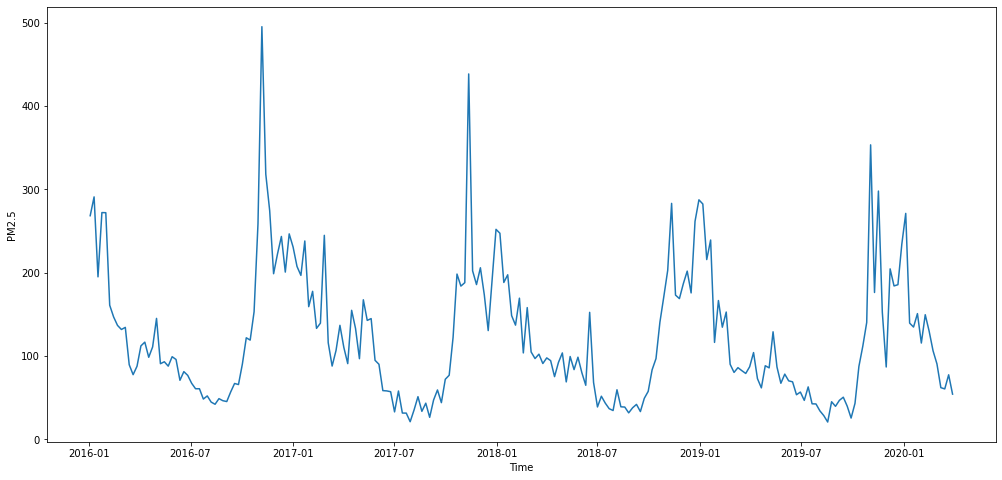

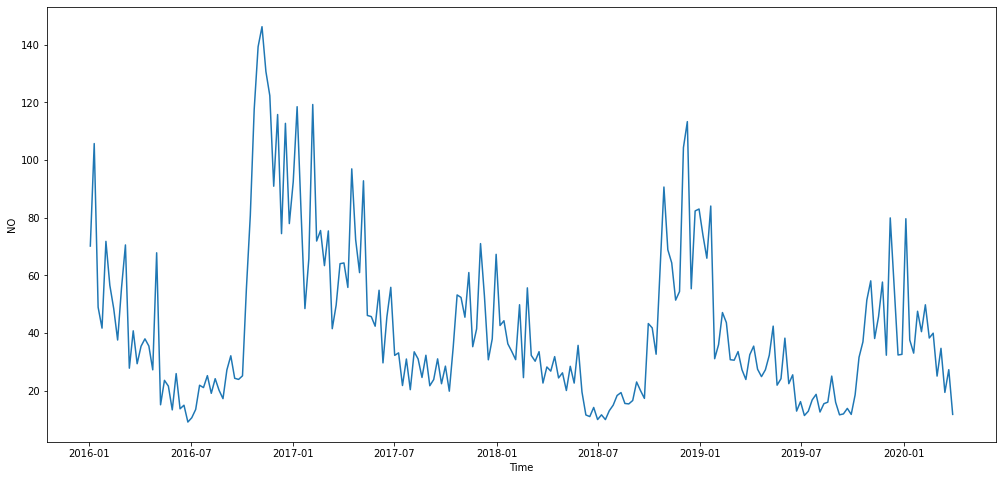

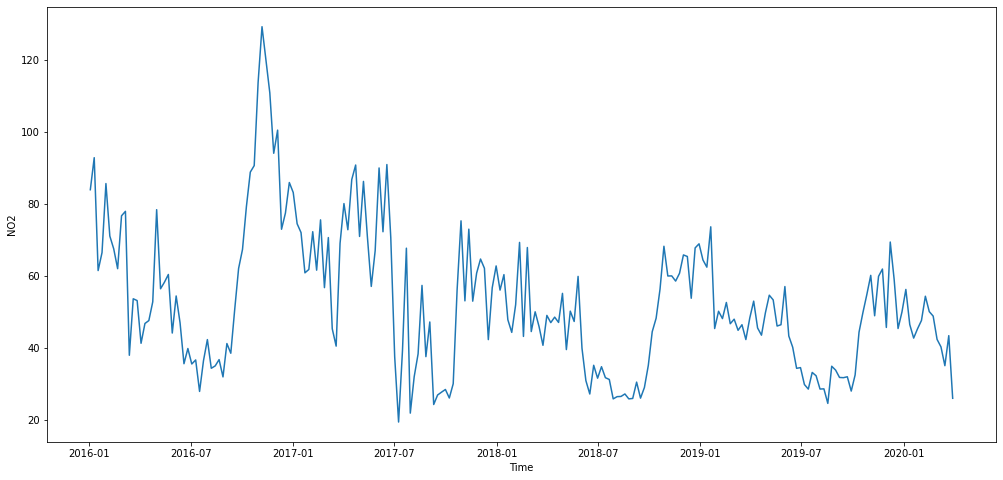

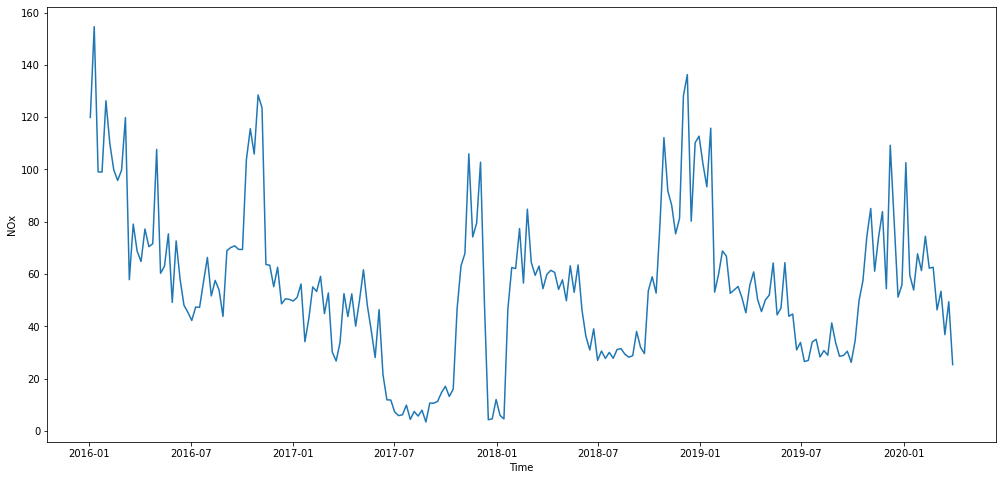

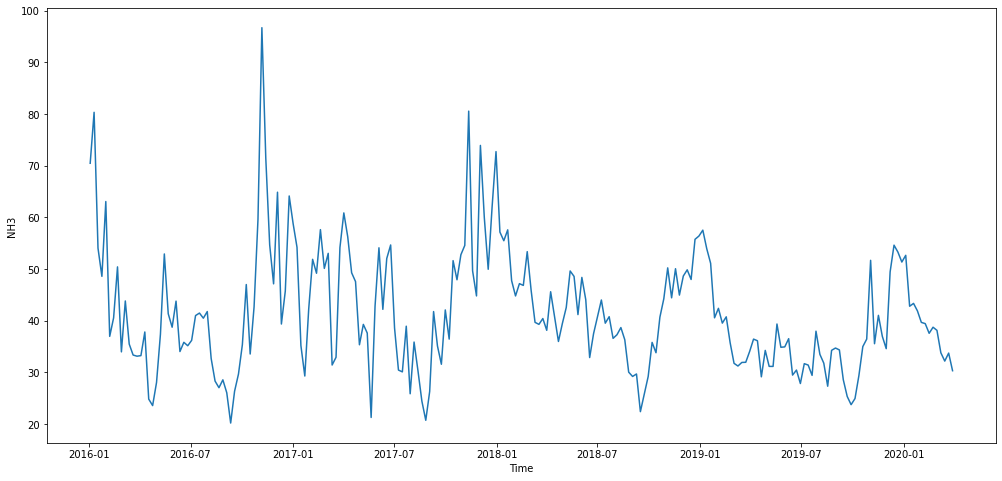

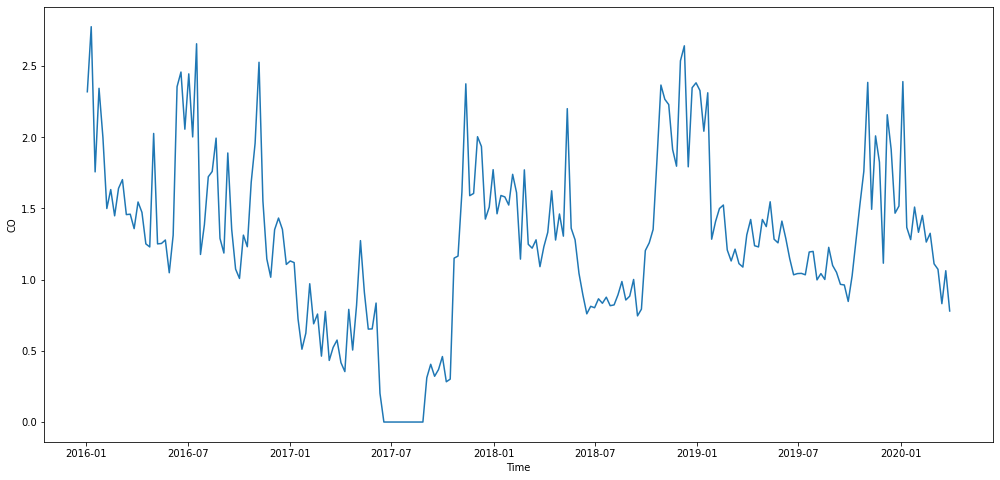

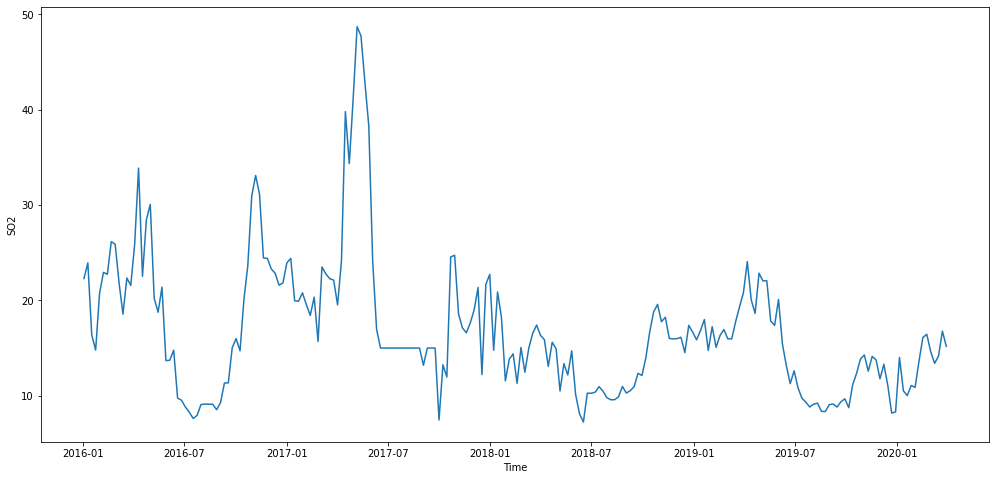

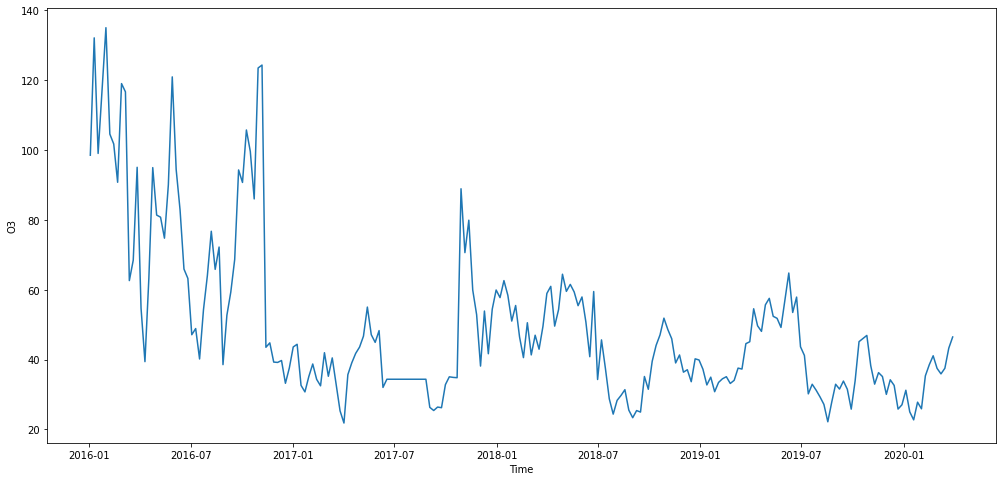

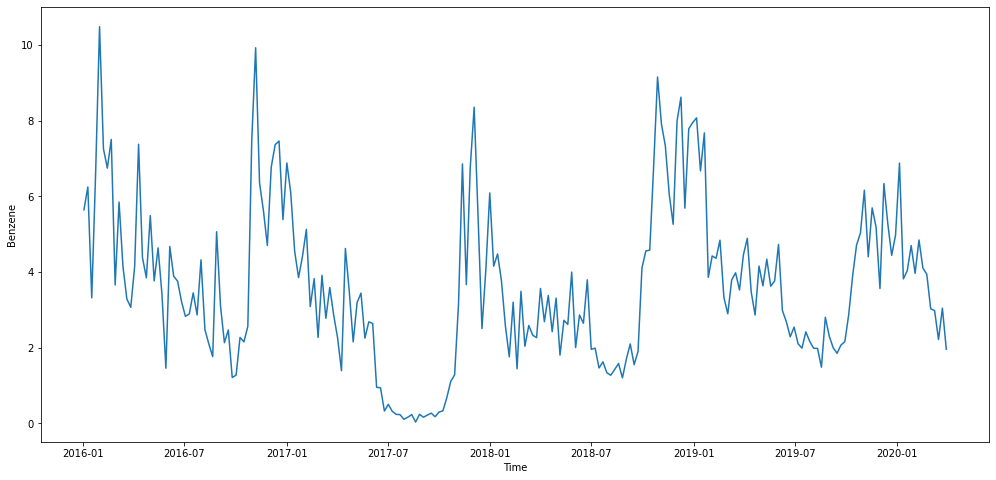

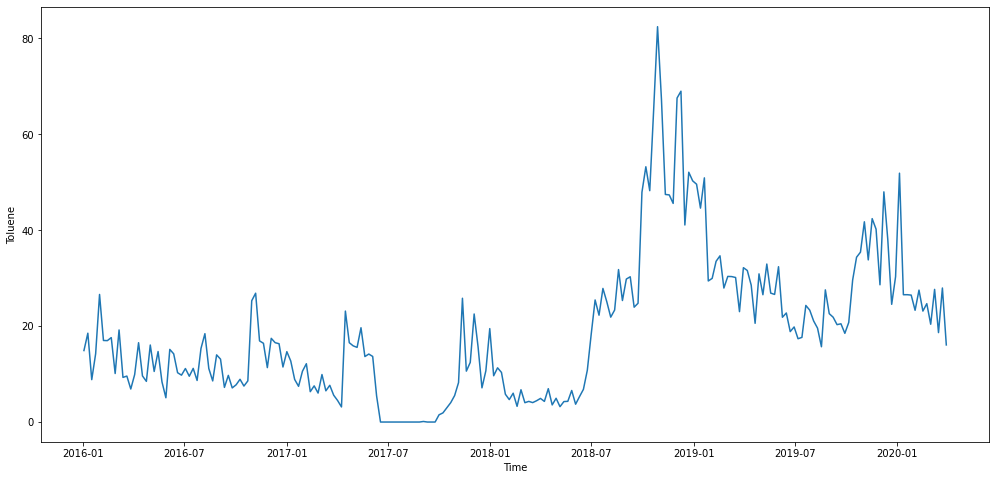

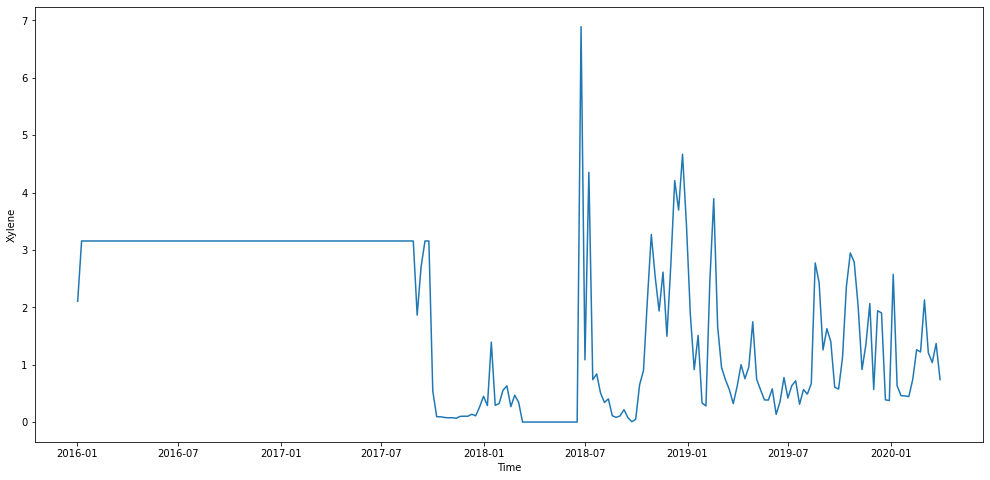

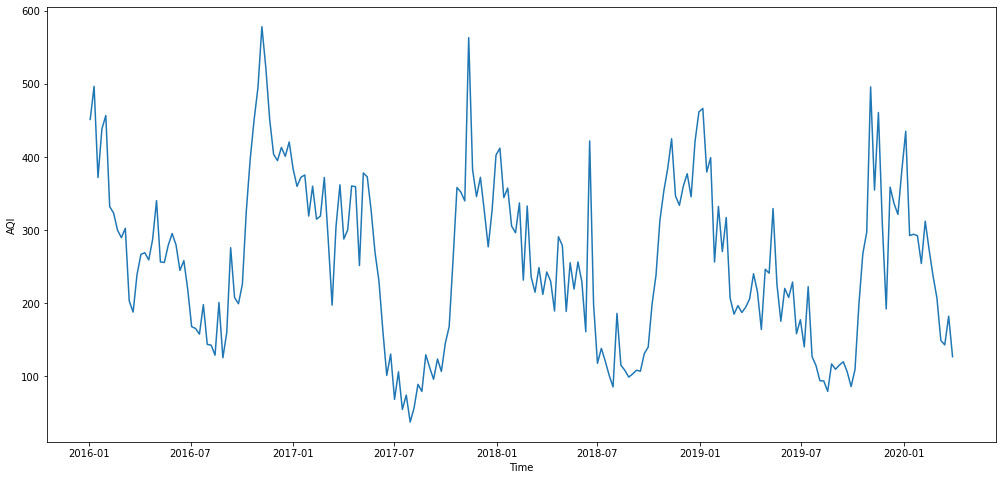

In [0]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df_delhi_before_covid[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df_delhi_before_covid.columns:
    plot_data(col)

In [0]:
df_delhi_before_covid = df_delhi_before_covid.reset_index()
df_delhi_before_covid = df_delhi_before_covid.rename({'Date':'ds','AQI':'y'} , axis = 1)
df_delhi_before_covid.head(1)

,ds,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,y
0,2016-01-03,268.34,70.15,83.976667,119.873333,70.46,2.32,22.28,98.54,5.643333,14.91,2.10393,451.333333


# Modeling on before dataset

In [0]:
train  = df_delhi_before_covid

cols = train.columns.tolist()

In [0]:
cols = ['ds',
 'y', 
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene'
 ]

In [0]:
train = train[cols]
train_y = train[['ds','y']]
train_y.head(3)

,ds,y
0,2016-01-03,451.333333
1,2016-01-10,496.571429
2,2016-01-17,372.000000


In [0]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [0]:
m = Prophet()

In [0]:
#m.add_regressor('PM2.5')
#m.add_regressor('NO')
#m.add_regressor('NO2')
#m.add_regressor('NOx')
#m.add_regressor('NH3')
#m.add_regressor('CO')
#m.add_regressor('SO2')
#m.add_regressor('O3')
#m.add_regressor('Benzene')
#m.add_regressor('Toluene')
#m.add_regressor('Xylene')

In [0]:
m.fit(train_y)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods= 365 )
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
582,2021-03-25,193.004310,102.627084,220.873092,192.324035,193.637868,-31.080313,-31.080313,-31.080313,-31.080313,-31.080313,-31.080313,0.0,0.0,0.0,161.923997
583,2021-03-26,192.950994,105.280479,221.528660,192.268294,193.587983,-28.591341,-28.591341,-28.591341,-28.591341,-28.591341,-28.591341,0.0,0.0,0.0,164.359654
584,2021-03-27,192.897679,105.366863,235.320957,192.212554,193.537542,-26.119479,-26.119479,-26.119479,-26.119479,-26.119479,-26.119479,0.0,0.0,0.0,166.778199
585,2021-03-28,192.844363,112.871130,232.271755,192.154254,193.485495,-23.705705,-23.705705,-23.705705,-23.705705,-23.705705,-23.705705,0.0,0.0,0.0,169.138658
586,2021-03-29,192.791047,112.390555,230.642619,192.095318,193.436315,-21.386628,-21.386628,-21.386628,-21.386628,-21.386628,-21.386628,0.0,0.0,0.0,171.404419


In [0]:
train_nox = train[['ds','NOx']]
train_nox = train_nox.rename({'NOx':'y'},axis=1)
m = Prophet()
m.fit(train_nox)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods= 365 )
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
582,2021-03-25,61.864197,32.136589,80.991961,59.240080,64.723635,-4.541966,-4.541966,-4.541966,-4.541966,-4.541966,-4.541966,0.0,0.0,0.0,57.322230
583,2021-03-26,61.877979,32.952203,81.452190,59.243561,64.753493,-4.283609,-4.283609,-4.283609,-4.283609,-4.283609,-4.283609,0.0,0.0,0.0,57.594370
584,2021-03-27,61.891762,34.180690,83.460124,59.247043,64.780103,-4.028647,-4.028647,-4.028647,-4.028647,-4.028647,-4.028647,0.0,0.0,0.0,57.863115
585,2021-03-28,61.905544,31.768525,82.675109,59.250524,64.799985,-3.782035,-3.782035,-3.782035,-3.782035,-3.782035,-3.782035,0.0,0.0,0.0,58.123510
586,2021-03-29,61.919327,31.327323,82.844996,59.248901,64.823343,-3.547195,-3.547195,-3.547195,-3.547195,-3.547195,-3.547195,0.0,0.0,0.0,58.372132


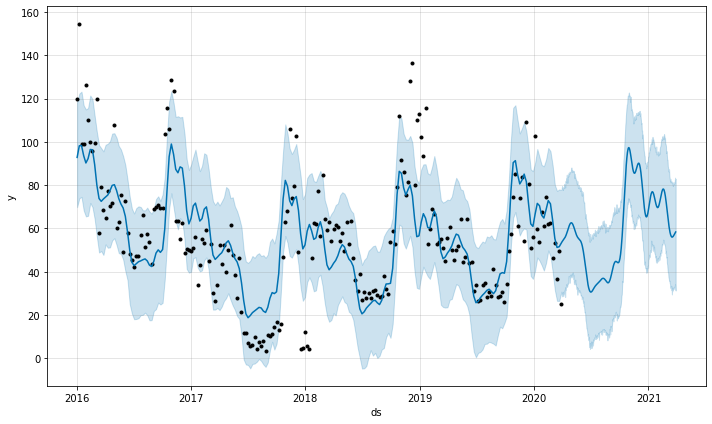

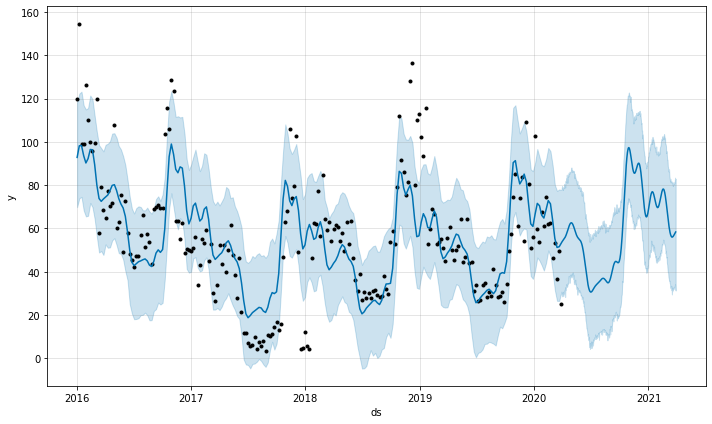

In [0]:
m.plot(forecast)

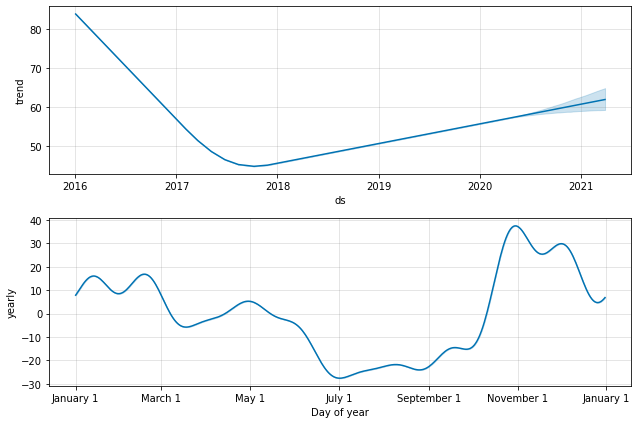

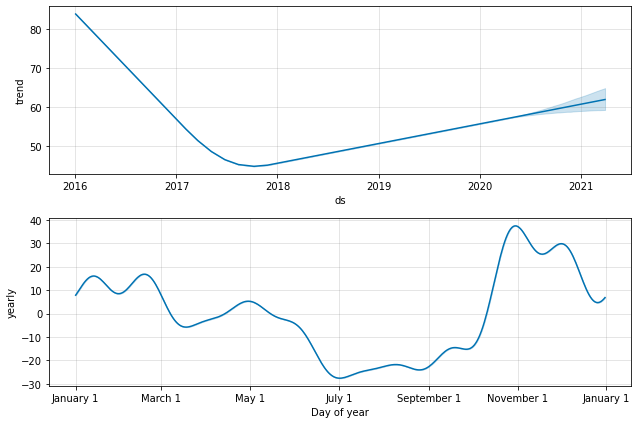

In [0]:
m.plot_components(forecast)

In [0]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(train_nox, forecast)

cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-03,92.812534,69.813895,118.216923,119.873333
2016-01-10,98.171273,73.891482,122.291627,154.591429
2016-01-17,98.289704,74.597650,123.180698,99.045714
2016-01-24,93.572883,68.309656,116.830279,98.975714
2016-01-31,90.244765,65.555923,114.994917,126.248571


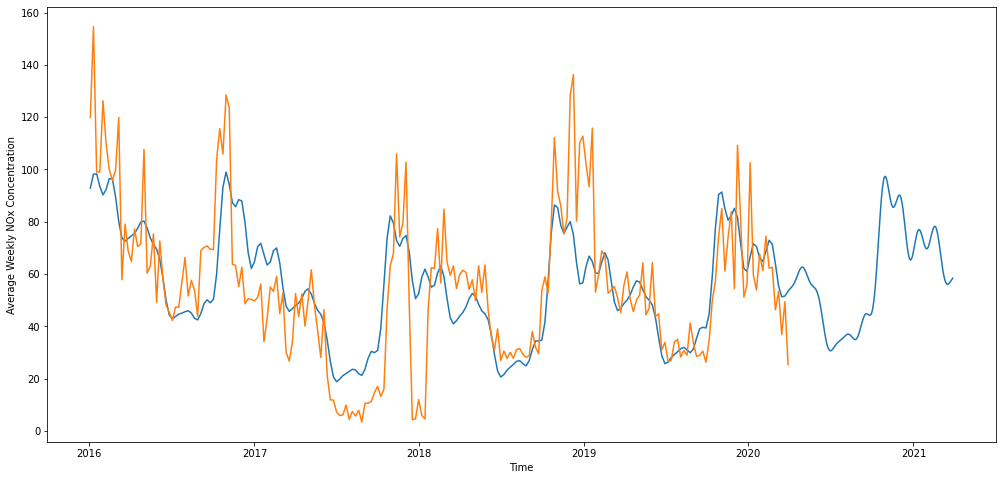

In [0]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])

plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
plt.show()


# **During corona**

In [0]:
df_delhi_after_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2020-03-24,55.85,12.30,27.07,26.48,31.91,0.81,15.81,38.23,2.53,16.24,0.64,124.0
2020-03-25,37.87,13.09,21.11,22.57,34.43,0.68,11.49,32.11,1.67,13.62,0.71,92.0
2020-03-26,45.69,9.02,16.58,17.41,33.68,0.58,12.82,30.59,1.38,8.88,0.70,93.0
2020-03-27,26.89,8.34,15.32,15.89,27.40,0.53,11.04,27.38,1.11,9.17,2.33,76.0
2020-03-28,21.23,9.87,17.52,18.34,25.22,0.54,10.28,25.06,1.07,9.76,0.71,51.0


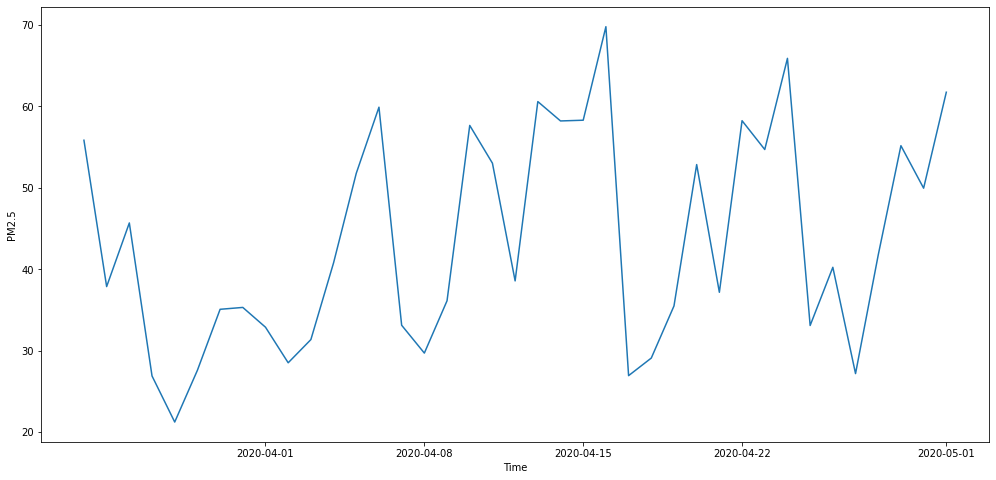

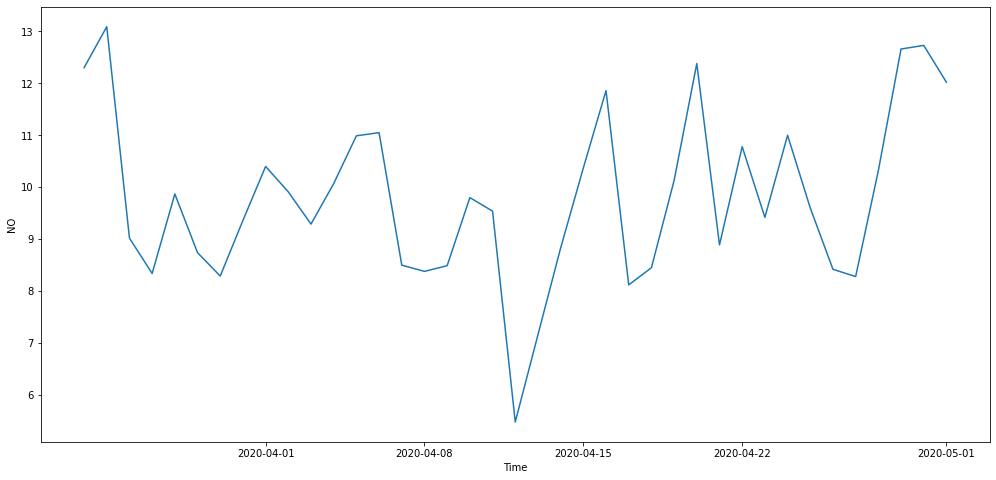

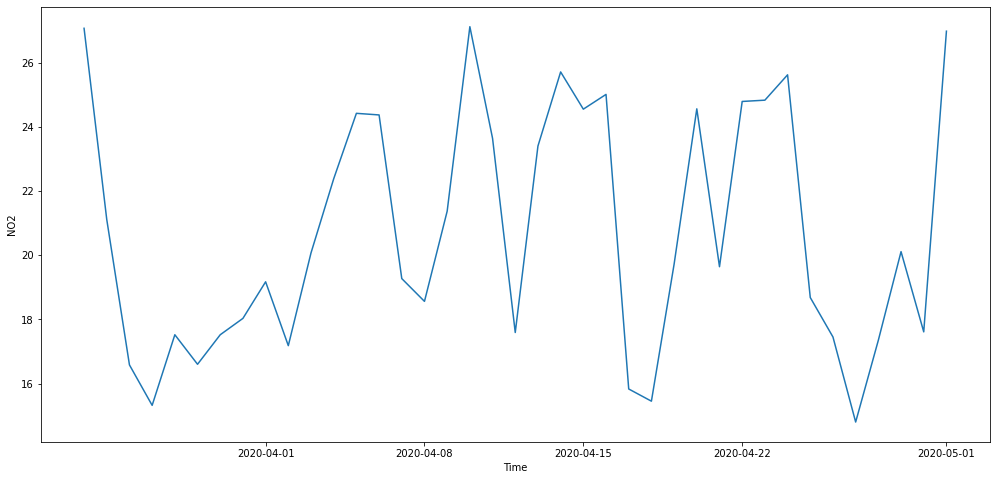

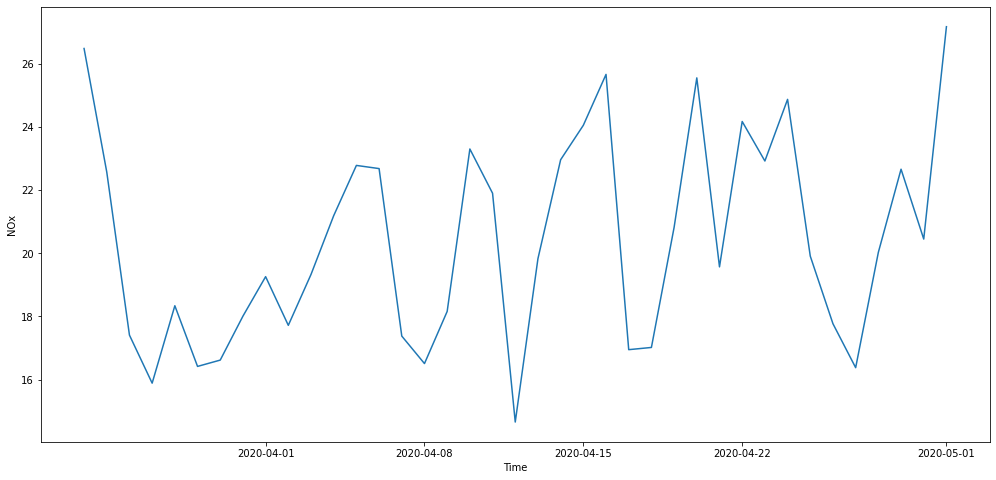

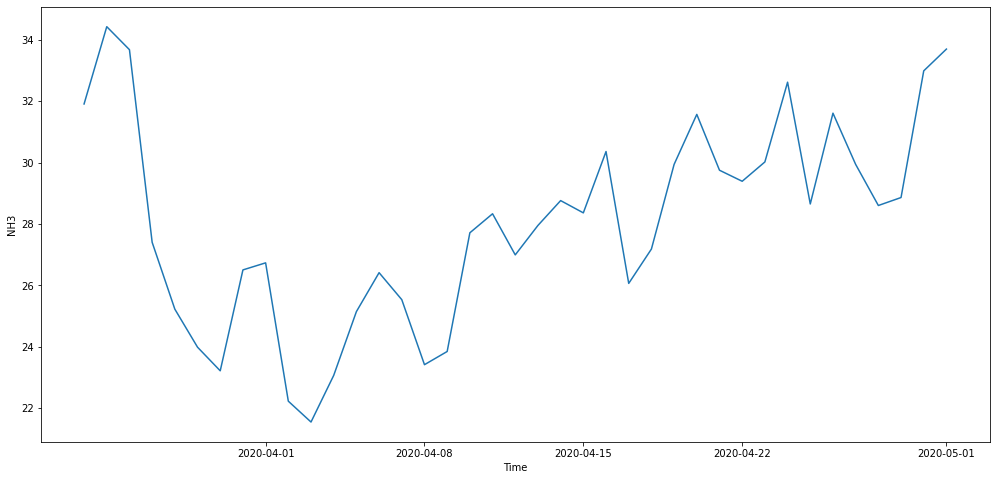

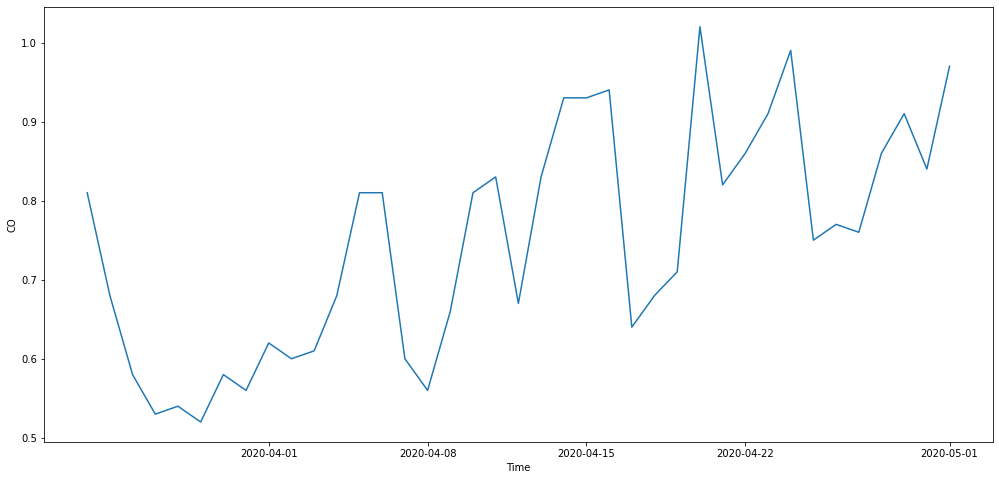

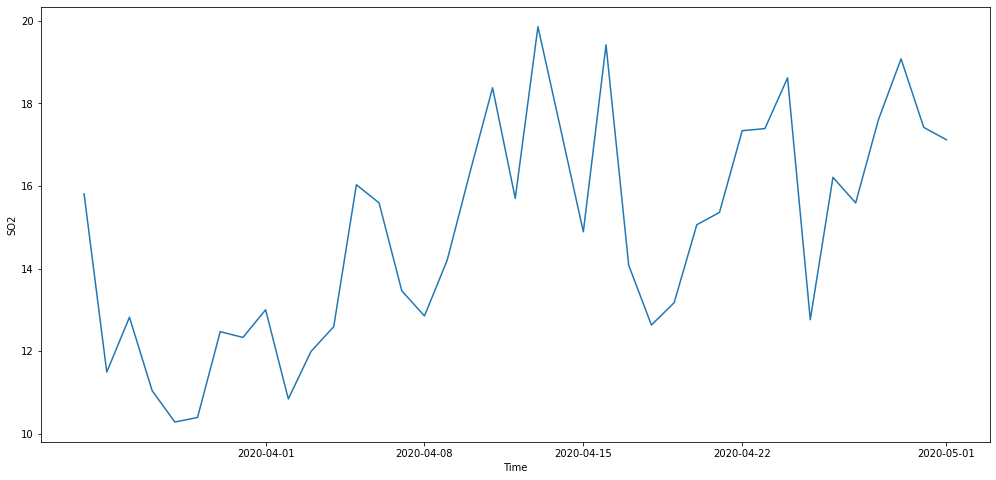

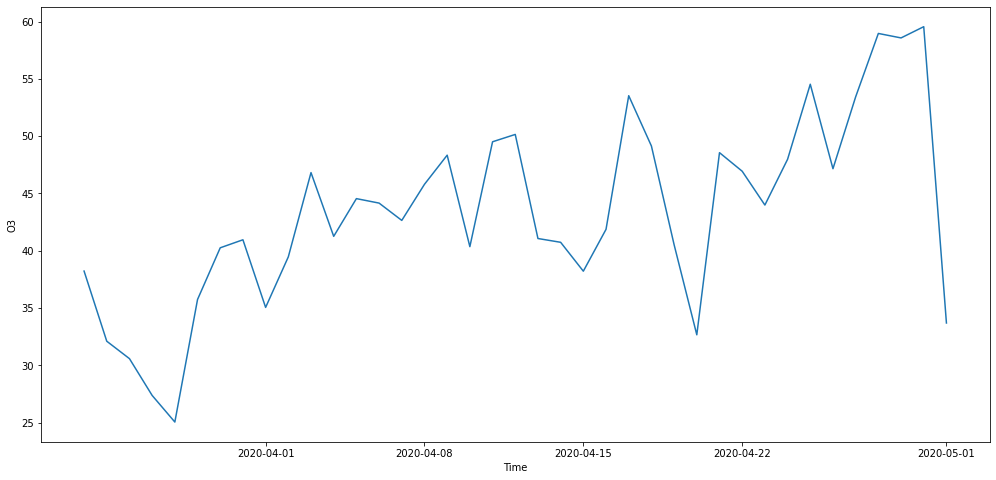

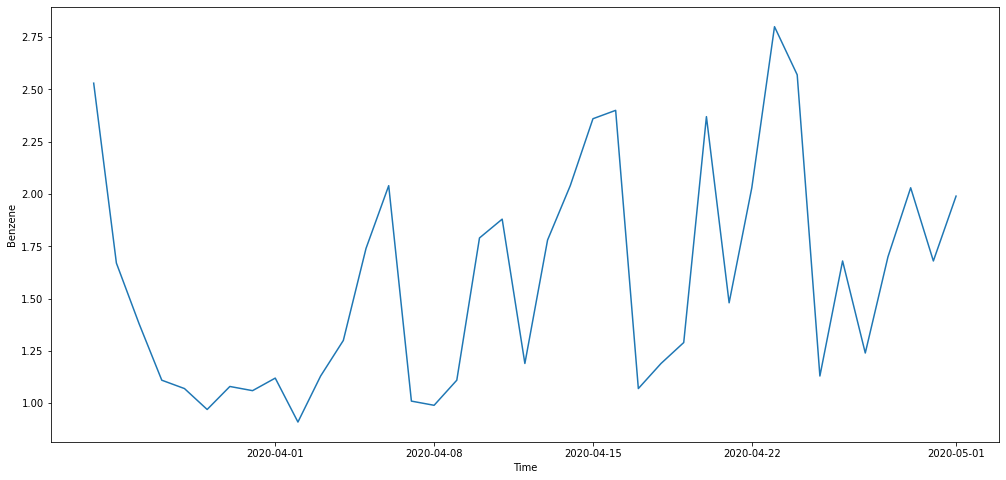

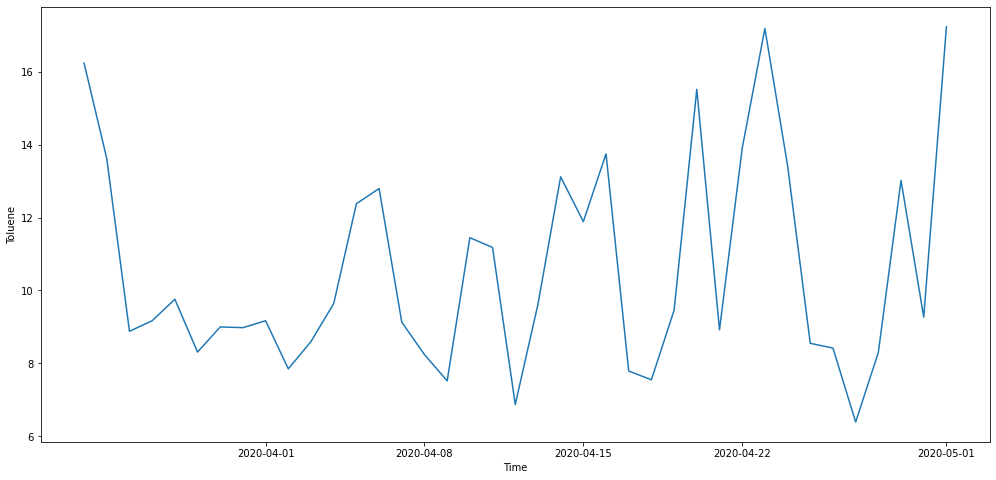

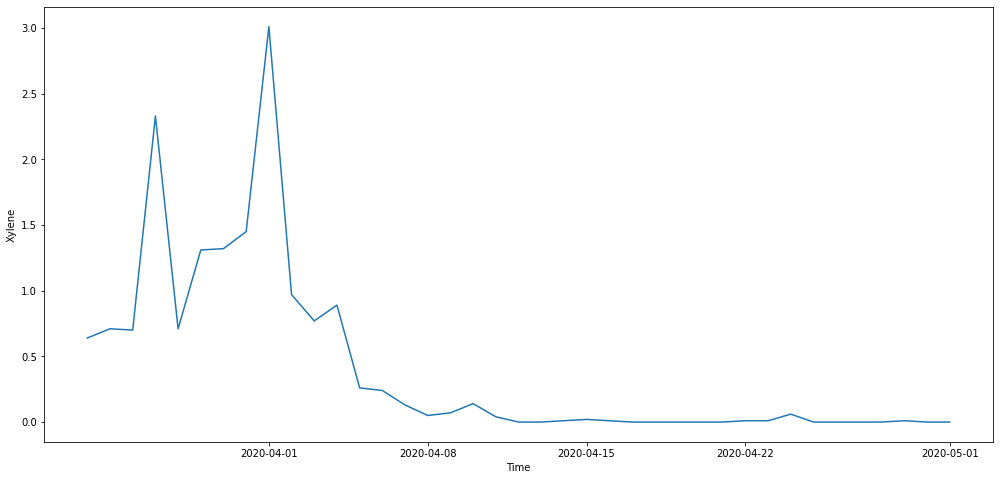

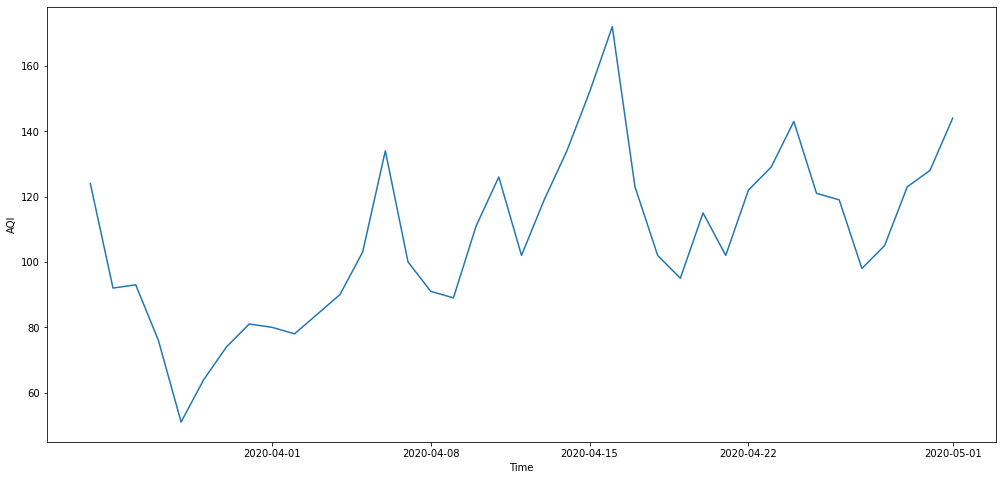

In [0]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df_delhi_after_covid[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df_delhi_after_covid.columns:
    plot_data(col)

In [0]:
df_delhi_after_covid = df_delhi_after_covid.reset_index()
df_delhi_after_covid = df_delhi_after_covid.rename({'Date':'ds','AQI':'y'} , axis = 1)
df_delhi_after_covid.head(1)

,ds,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,y
0,2020-03-24,55.85,12.3,27.07,26.48,31.91,0.81,15.81,38.23,2.53,16.24,0.64,124.0


In [0]:
tr  = df_delhi_after_covid

cols = tr.columns.tolist()

In [0]:
cols = ['ds',
 'y', 
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene'
 ]

In [0]:
tr_nox = tr[['ds','NOx']]
tr_nox = tr_nox.rename({'NOx':'y'},axis=1)
f1 = Prophet()
f1.fit(tr_nox)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future1 = f1.make_future_dataframe(periods= 40 )
forecast1 = f1.predict(future1)
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2020-06-06,24.763884,20.686851,27.877566,24.763882,24.763885,-0.577546,-0.577546,-0.577546,-0.577546,-0.577546,-0.577546,0.0,0.0,0.0,24.186338
75,2020-06-07,24.844458,19.244002,26.932223,24.844457,24.844460,-1.840082,-1.840082,-1.840082,-1.840082,-1.840082,-1.840082,0.0,0.0,0.0,23.004376
76,2020-06-08,24.925033,20.477166,28.615895,24.925031,24.925034,-0.196182,-0.196182,-0.196182,-0.196182,-0.196182,-0.196182,0.0,0.0,0.0,24.728851
77,2020-06-09,25.005607,21.644795,29.435600,25.005606,25.005609,0.532196,0.532196,0.532196,0.532196,0.532196,0.532196,0.0,0.0,0.0,25.537804
78,2020-06-10,25.086182,22.675246,30.390779,25.086180,25.086183,1.251799,1.251799,1.251799,1.251799,1.251799,1.251799,0.0,0.0,0.0,26.337981


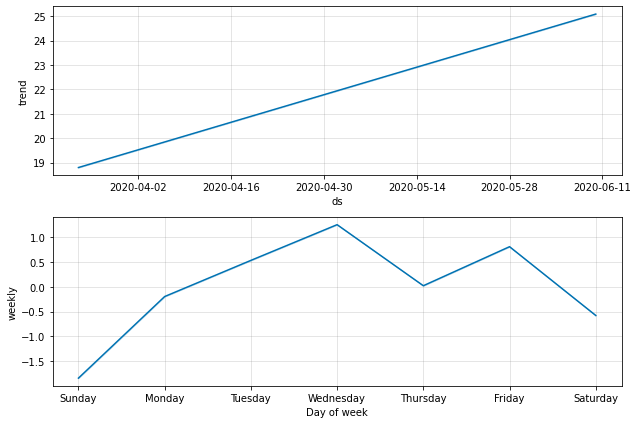

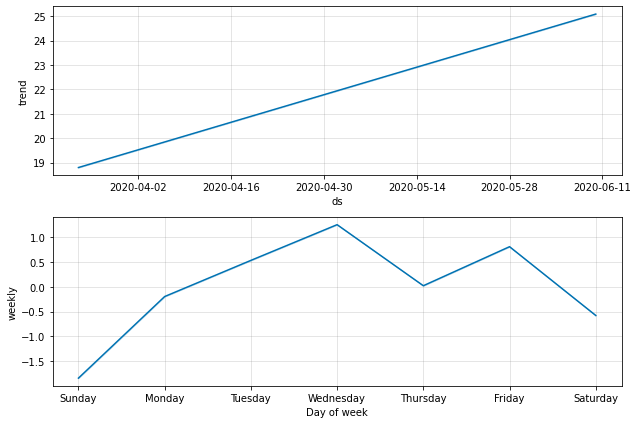

In [0]:
f1.plot_components(forecast1)

In [0]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df1 = make_comparison_dataframe(tr_nox, forecast1)

cmp_df1.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,19.333564,15.513840,23.251495,26.48
2020-03-25,20.133741,16.263786,24.023820,22.57
2020-03-26,18.984273,15.165303,22.869369,17.41
2020-03-27,19.851149,15.969361,23.679905,15.89
2020-03-28,18.546119,14.802292,22.323200,18.34


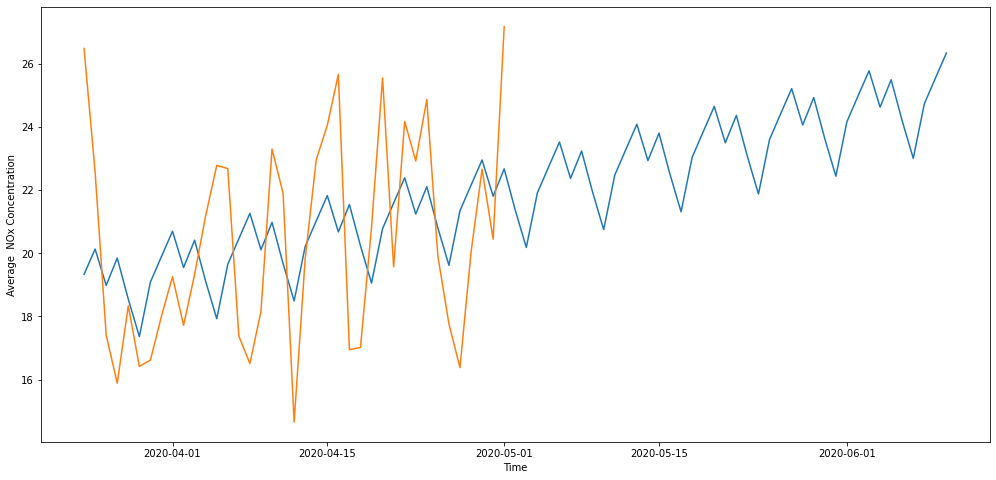

In [0]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df1['yhat'])

plt.plot(cmp_df1['y'])
plt.xlabel('Time')
plt.ylabel('Average  NOx Concentration')
plt.grid(False)
plt.show()

**Now will do analysis for SO2 for before and after covid**

In [0]:
# before first

In [0]:
tr1_so2 = train[['ds','SO2']]
tr1_so2 = tr1_so2.rename({'SO2':'y'},axis=1)
s1 = Prophet()
s1.fit(tr1_so2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future1_so2 = s1.make_future_dataframe(periods= 365 )
forecast1_so2 = s1.predict(future1_so2)
forecast1_so2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
582,2021-03-25,9.557279,6.422267,18.521558,9.491078,9.618765,2.946809,2.946809,2.946809,2.946809,2.946809,2.946809,0.0,0.0,0.0,12.504088
583,2021-03-26,9.550886,6.558132,18.753373,9.484357,9.612771,3.092859,3.092859,3.092859,3.092859,3.092859,3.092859,0.0,0.0,0.0,12.643744
584,2021-03-27,9.544493,6.441774,19.168431,9.477636,9.606587,3.237818,3.237818,3.237818,3.237818,3.237818,3.237818,0.0,0.0,0.0,12.782311
585,2021-03-28,9.538100,6.976394,19.346062,9.470923,9.600397,3.382012,3.382012,3.382012,3.382012,3.382012,3.382012,0.0,0.0,0.0,12.920112
586,2021-03-29,9.531707,7.047734,19.475470,9.464223,9.594207,3.525942,3.525942,3.525942,3.525942,3.525942,3.525942,0.0,0.0,0.0,13.057649


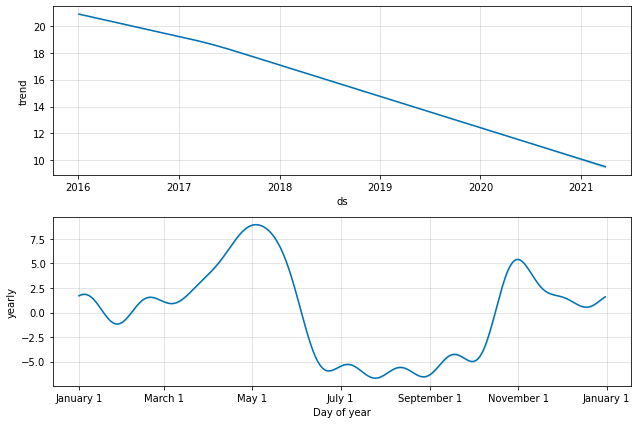

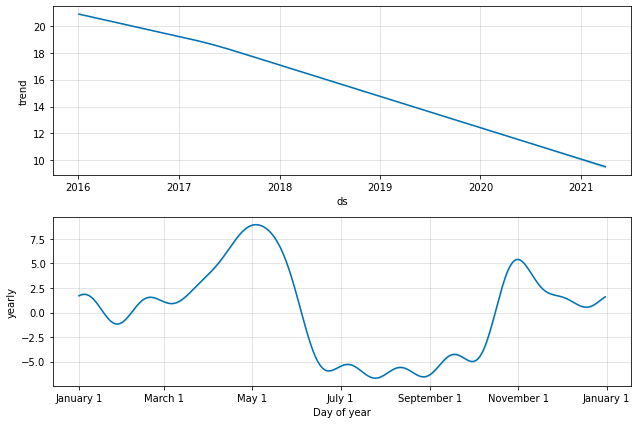

In [0]:
s1.plot_components(forecast1_so2)

In [0]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df1_so2 = make_comparison_dataframe(tr1_so2, forecast1_so2)

cmp_df1_so2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-03,22.670970,16.020743,28.672750,22.280000
2016-01-10,22.451450,16.528357,28.051474,23.925714
2016-01-17,21.185219,15.032014,27.280845,16.370000
2016-01-24,19.879494,13.836200,26.110857,14.775714
2016-01-31,19.692549,13.966061,25.164587,20.730000


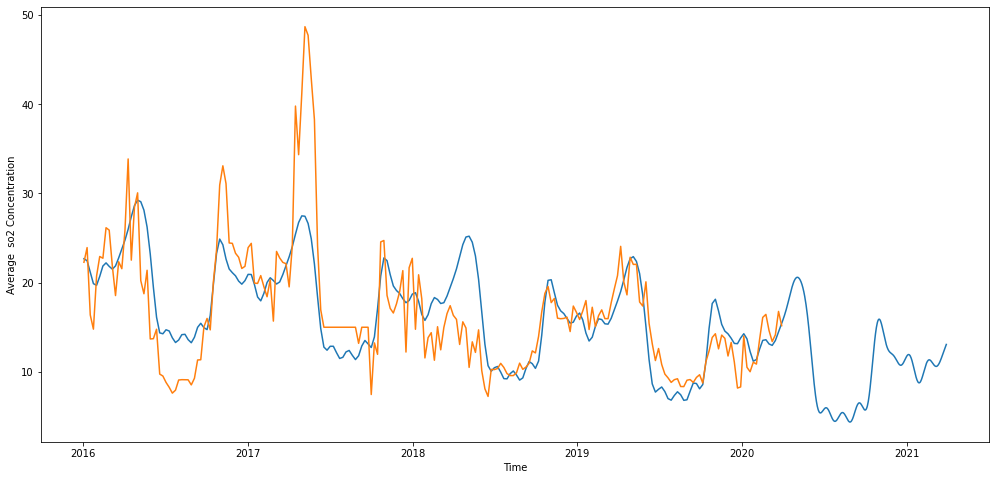

In [0]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df1_so2['yhat'])

plt.plot(cmp_df1_so2['y'])
plt.xlabel('Time')
plt.ylabel('Average  so2 Concentration')
plt.grid(False)
plt.show()

In [0]:
# after covid

In [0]:
tr2_so2 = tr[['ds','SO2']]
tr2_so2 = tr_nox.rename({'SO2':'y'},axis=1)
s2 = Prophet()
s2.fit(tr2_so2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future2_so2 = f1.make_future_dataframe(periods= 40 )
forecast2_so2 = f1.predict(future2_so2)
forecast2_so2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2020-06-06,24.763884,20.378989,27.985360,24.763882,24.763885,-0.577546,-0.577546,-0.577546,-0.577546,-0.577546,-0.577546,0.0,0.0,0.0,24.186338
75,2020-06-07,24.844458,19.189627,26.661233,24.844457,24.844460,-1.840082,-1.840082,-1.840082,-1.840082,-1.840082,-1.840082,0.0,0.0,0.0,23.004376
76,2020-06-08,24.925033,20.816267,28.660979,24.925031,24.925034,-0.196182,-0.196182,-0.196182,-0.196182,-0.196182,-0.196182,0.0,0.0,0.0,24.728851
77,2020-06-09,25.005607,21.404049,29.436511,25.005606,25.005609,0.532196,0.532196,0.532196,0.532196,0.532196,0.532196,0.0,0.0,0.0,25.537804
78,2020-06-10,25.086182,22.724420,30.208567,25.086180,25.086183,1.251799,1.251799,1.251799,1.251799,1.251799,1.251799,0.0,0.0,0.0,26.337981


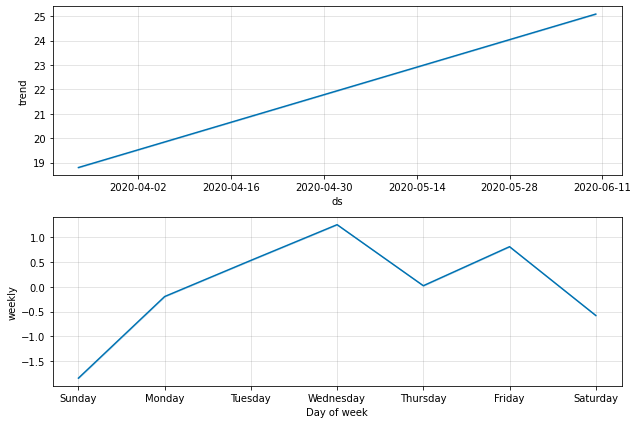

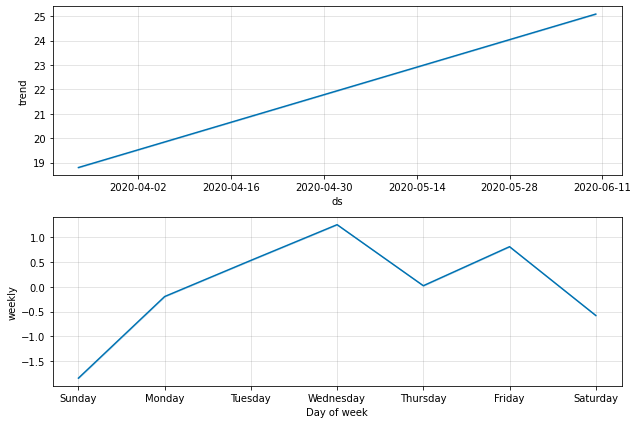

In [0]:
s2.plot_components(forecast2_so2)

In [0]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df2_so2 = make_comparison_dataframe(tr2_so2, forecast2_so2)

cmp_df2_so2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,19.333564,15.464429,23.129505,26.48
2020-03-25,20.133741,16.032529,23.972875,22.57
2020-03-26,18.984273,15.293327,22.708582,17.41
2020-03-27,19.851149,15.700024,23.797826,15.89
2020-03-28,18.546119,14.711557,22.332327,18.34


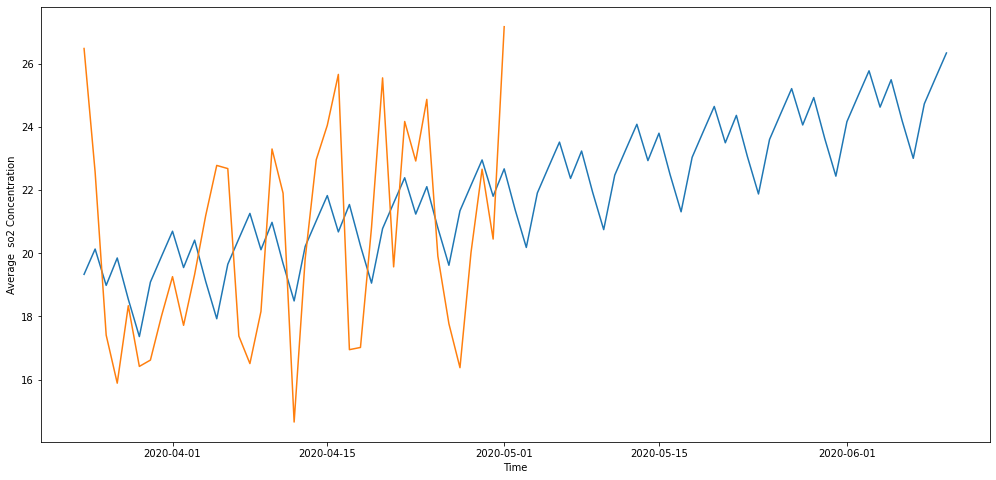

In [0]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df2_so2['yhat'])

plt.plot(cmp_df2_so2['y'])
plt.xlabel('Time')
plt.ylabel('Average  so2 Concentration')
plt.grid(False)
plt.show()